https://m.blog.naver.com/PostView.nhn?blogId=moojigai07&logNo=120186757908&proxyReferer=https%3A%2F%2Fwww.google.com%2F

    1. 최소자승법으로 a,b구한 뒤 X_test의 Y값을 구한다 : y_pred
    -(a * X_test ) + b

    2. sklearn 회귀모델로 X_test의 Y값을 구한다 : y_pred_sk

    3. 실제값(y_test)과 y_pred, y_pred_sk 간의 차이를 구해서 얼마나 비슷하게 나오는지 비교

### 라이브러리 불러오기

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from math import sqrt

### data load

In [20]:
product = pd.read_csv('product.csv', encoding='cp949')

In [21]:
product.head()

,제품_친밀도,제품_적절성,제품_만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2


In [22]:
len(product)

264

### Test / Train 분리

In [23]:
product_train = product[product.index < 200]
product_test = product[product.index >= 200]

In [24]:
X_train = product_train[['제품_친밀도']]
y_train = product_train.iloc[:,-1]

X_test = product_test[['제품_친밀도']]
y_test = product_test.iloc[:,-1]

### LinearRegression(sklearn) 

In [25]:
linear = LinearRegression().fit(X_train, y_train)

### 라이브러리 활용 Prediction 예측

In [26]:
predict_linear = linear.predict(X_test)

In [27]:
predict_linear

array([3.41419081, 3.09998587, 3.72839576, 3.41419081, 2.47157597,
       3.09998587, 2.47157597, 3.72839576, 3.09998587, 3.72839576,
       2.47157597, 3.41419081, 3.09998587, 3.72839576, 3.41419081,
       3.09998587, 3.09998587, 3.41419081, 3.41419081, 3.09998587,
       3.09998587, 3.41419081, 3.09998587, 2.47157597, 3.41419081,
       3.09998587, 3.09998587, 3.41419081, 3.09998587, 3.41419081,
       3.09998587, 3.41419081, 3.09998587, 3.41419081, 3.09998587,
       3.09998587, 3.41419081, 3.09998587, 3.09998587, 3.41419081,
       2.47157597, 3.09998587, 3.41419081, 3.41419081, 3.09998587,
       3.09998587, 3.41419081, 3.41419081, 3.41419081, 2.78578092,
       3.41419081, 3.09998587, 3.41419081, 3.09998587, 2.78578092,
       3.09998587, 3.09998587, 3.09998587, 2.47157597, 3.09998587,
       3.09998587, 3.41419081, 3.41419081, 2.78578092])

In [28]:
import numpy as np

In [29]:
product_train.head()

,제품_친밀도,제품_적절성,제품_만족도
0,3,4,3
1,3,3,2
2,4,4,4
3,2,2,2
4,2,2,2


In [30]:
X_train.head()

,제품_친밀도
0,3
1,3
2,4
3,2
4,2


In [31]:
y_train.head()

0    3
1    2
2    4
3    2
4    2
Name: 제품_만족도, dtype: int64

In [32]:
X_train.mean(), y_train.mean()

(제품_친밀도    2.825
 dtype: float64, 3.045)

In [33]:
X_train.sum(), y_train.sum()

(제품_친밀도    565
 dtype: int64, 609)

In [34]:
len(X_train), len(y_train)

(200, 200)

In [35]:
a = X_train.values
b = y_train.values

In [36]:
a * b

array([[ 9,  6, 12, ...,  9,  9, 12],
       [ 9,  6, 12, ...,  9,  9, 12],
       [12,  8, 16, ..., 12, 12, 16],
       ...,
       [ 9,  6, 12, ...,  9,  9, 12],
       [ 9,  6, 12, ...,  9,  9, 12],
       [12,  8, 16, ..., 12, 12, 16]], dtype=int64)

In [37]:
(a * b).sum()

344085

In [38]:
y_train[0]

3

In [39]:
X_train['제품_친밀도'][0]

3

### 최소자승법으로 기울기(a), 절편(b) 구하기

시그마(y-f(x))^

함수 y=f(x)가 일차함수 y=ax+b 일때 편차를 제곱한 것의 합이 최소가 되도록 하는 상수 a와 b를 찾는 것이 최소승법이다

E(a,b) = 시그마(y-(ax+b))^
위 식의 최소값을 구하려면 편미분을 해야함. 

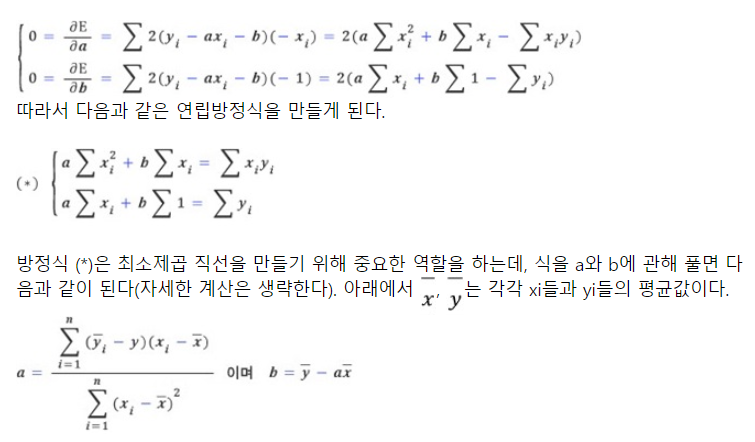

In [80]:
y_train.mean(), X_train.mean()

(3.045, 제품_친밀도    2.825
 dtype: float64)

### 기울기 구하기

In [136]:
ja_list=[]
mo_list=[]

for i in range(len(X_train)):
    ja = (y_train[i]-3.045) * (X_train['제품_친밀도'][i]-2.825)
    ja_list.append(ja)
    mo = np.square((X_train['제품_친밀도'][i]-2.825))
    mo_list.append(mo)
    
a = sum(ja_list)/sum(mo_list)
a

0.3142049469964677

In [137]:
# for i in range(len(X_train)):
#     ja = (3.045-y_train[i]) * (X_train['제품_친밀도'][i]-2.825)
# ja

### 절편 구하기

In [138]:
b = 3.045-(a*2.825)
b

2.1573710247349784

In [139]:
# train식의 : a, b
a,b 

(0.3142049469964677, 2.1573710247349784)

In [140]:
X_test.columns

Index(['제품_친밀도'], dtype='object')

### 최소자승법으로 구한 a,b를 X_test에 대입
 - Y예측값이 나옴

In [141]:
y_pred_list=[]
for i in range(200, 264):
    y_pred = (a * X_test['제품_친밀도'][i]) + b
    y_pred_list.append(y_pred)
    
    
y_pred_list[0:10]

[3.4141908127208493,
 3.0999858657243817,
 3.728395759717317,
 3.4141908127208493,
 2.471575971731446,
 3.0999858657243817,
 2.471575971731446,
 3.728395759717317,
 3.0999858657243817,
 3.728395759717317]

In [143]:
y_test_list = list(y_test)

In [144]:
y_test[200]

4

In [145]:
y_pred_list[0:5]

[3.4141908127208493,
 3.0999858657243817,
 3.728395759717317,
 3.4141908127208493,
 2.471575971731446]

In [146]:
len(y_test_list), len(y_pred_list)

(64, 64)

In [147]:
y_test_list[0], y_pred_list[0]

(4, 3.4141908127208493)

### 예측한 Y값과 실제 Y값의 MSE(최소자승법)

In [148]:
for i in range(len(y_test_list)):
    result_cal = (np.square(y_test_list[i] - y_pred_list[i])).mean()
result_cal

0.04588981478105654

In [149]:
predict_linear[0]

3.414190812720848

### 예측한 Y값과 실제 Y값의 MSE(sklearn Linear Model)

In [150]:
for i in range(len(y_test_list)):
    result_model = (np.square(y_test_list[i] - predict_linear[i])).mean()
result_model

0.04588981478105616

### 회귀식으로 구했을 때의 오차
 - 0.04588981478105654

### sklearn Linear model 사용했을 때의 오차 
- 0.04588981478105616